In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housing_price.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
# info method gives the information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


PreProcessing

In [4]:
# drop rows with missing values or NaN
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [5]:
# convert categorical data to numerical data
df['ocean_proximity'].value_counts()

# one hot encoding
df = df.join(pd.get_dummies(df['ocean_proximity'], dtype = int)).drop('ocean_proximity', axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


Train the regrssion model - linear and Random forest regressor 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))

score = model.score(X_test, y_test)
print("Score: ", score)


MSE:  4802173538.6041565
Score:  0.6488402154431996


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))

score = model.score(X_test, y_test)
print("Score: ", score)

MSE:  2387495902.3643317
Score:  0.8254139422566147


Hyper Parameter tuning to get better accuracy

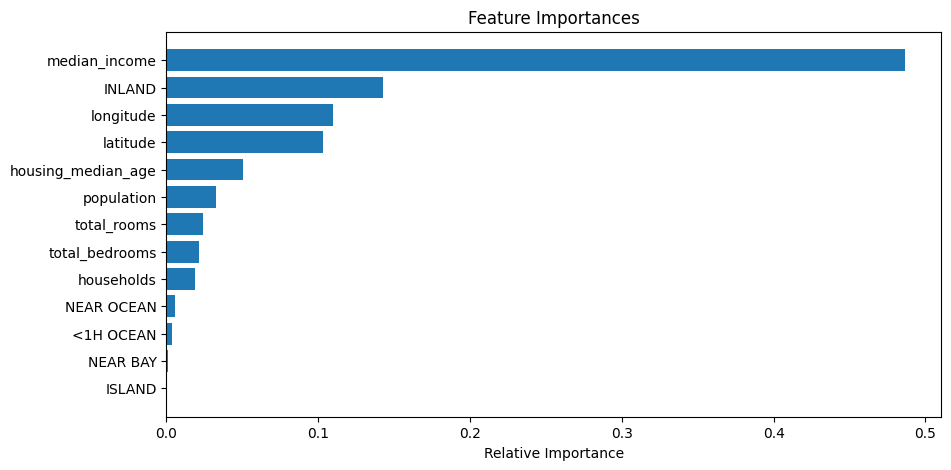

In [8]:
# understand the importance of each feature
importances = model.feature_importances_
features = X.columns
indices = importances.argsort() # sort the indices of importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')            
plt.barh(range(len(indices)), importances[indices], align='center')     
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

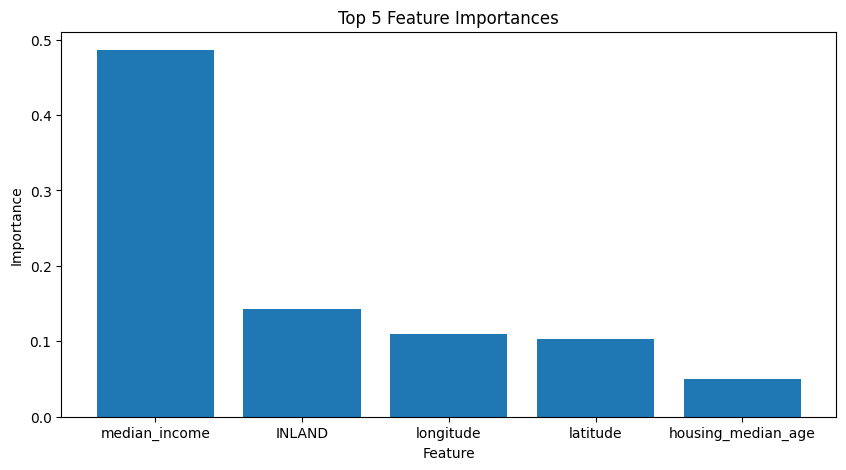

In [9]:
# another way to get the feature importance

importances = dict(zip(model.feature_names_in_, model.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])
plt.xlabel('Feature')   
plt.ylabel('Importance')    
plt.title('Top 5 Feature Importances')
plt.show()

In [10]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
score = model.score(X_test, y_test)
print("Score: ", score)


MSE:  2405128817.4210253
Score:  0.8241245322420367


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = RandomForestRegressor()

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),    
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=2, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [12]:
score = best_regressor.score(X_test, y_test)
print("Score: ", score)

y_pred = best_regressor.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Score:  0.8078428586881682
Mean Squared Error: 2627783646.7696056


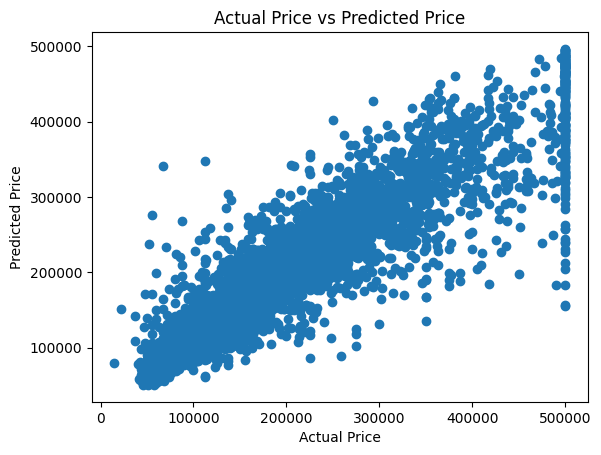

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()